In [1]:
#Library
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connect database
con = sqlite3.connect("olist.db")
cur = con.cursor()

In [3]:
#Cetak dataframe yang dibutuhkan
df_products = pd.read_sql("SELECT * FROM olist_products_dataset", con)
df_order_customer = pd.read_sql("SELECT * FROM olist_order_customer_dataset", con)
df_order = pd.read_sql("SELECT * FROM olist_order_dataset", con)
df_order_items = pd.read_sql("SELECT * FROM olist_order_items_dataset", con)
df_translations = pd.read_sql("SELECT * FROM product_category_name_translation", con)

In [4]:
# merge necessary dataframes
dataset = df_products.merge(df_translations, on='product_category_name', how='inner')
dataset = dataset.merge(df_order_items, on='product_id', how='outer')
dataset = dataset.merge(df_order, on='order_id', how='outer')
dataset = dataset.merge(df_order_customer, on='customer_id', how='outer')

In [5]:
dataset.head()

,index_x,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,index,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0.0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,...,2018-04-24 16:16:53,2018-04-24 19:04:19,2018-04-25 17:01:00,2018-04-27 16:42:17,2018-05-09 00:00:00,15721,b1a1199364a4a7fe27c4486ab63f550d,13848,mogi-guacu,SP
1,16.0,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,...,2017-11-16 21:28:00,2017-11-17 21:35:39,2017-11-21 22:14:50,2017-11-23 15:39:38,2017-11-29 00:00:00,71531,7139ee1d2ad919a82b6e68a29582264e,6519,santana de parnaiba,SP
2,16.0,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,...,2017-11-30 01:51:23,2017-12-08 16:33:14,2017-12-09 00:53:08,2017-12-13 20:52:32,2017-12-18 00:00:00,50453,48d6d950c0aba132537fc335c0c56e01,5893,sao paulo,SP
3,77.0,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,...,2017-07-28 09:34:29,2017-07-28 09:50:14,2017-07-28 21:42:11,2017-08-08 16:03:45,2017-08-21 00:00:00,496,0b3dc7efaafb0cf78a4796d42fa8d74c,22410,rio de janeiro,RJ
4,77.0,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,...,2018-05-17 09:24:18,2018-05-17 10:38:35,2018-06-01 09:04:00,2018-06-07 19:12:50,2018-06-05 00:00:00,14484,abd7e9db219836e58c3fca4965dd14e5,1042,sao paulo,SP


In [6]:
# Delete unnecessary columns
dataset = dataset.drop(columns=['product_photos_qty','index_y','index_x','product_name_lenght','product_description_lenght'
                                      ,'product_weight_g','freight_value','customer_zip_code_prefix','order_estimated_delivery_date'
                                      ,'order_delivered_customer_date','order_delivered_carrier_date','order_purchase_timestamp'
                                      ,'order_status','price','shipping_limit_date','seller_id'
                                      ,'product_length_cm','product_length_cm','product_width_cm','product_height_cm'
                                      ])

In [7]:
#Mengecek info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     112650 non-null  object 
 1   product_category_name          111023 non-null  object 
 2   product_category_name_english  111023 non-null  object 
 3   order_id                       113425 non-null  object 
 4   order_item_id                  112650 non-null  float64
 5   customer_id                    113425 non-null  object 
 6   order_approved_at              113264 non-null  object 
 7   index                          113425 non-null  int64  
 8   customer_unique_id             113425 non-null  object 
 9   customer_city                  113425 non-null  object 
 10  customer_state                 113425 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.4+ MB


# **DATA CLEANING**

**Cek Missing Value**

In [8]:
dataset.isna().sum()

product_id                        775
product_category_name            2402
product_category_name_english    2402
order_id                            0
order_item_id                     775
customer_id                         0
order_approved_at                 161
index                               0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dtype: int64

In [9]:
# Drop missing values
dataset = dataset.dropna()

In [11]:
dataset.isna().sum()

product_id                       0
product_category_name            0
product_category_name_english    0
order_id                         0
order_item_id                    0
customer_id                      0
order_approved_at                0
index                            0
customer_unique_id               0
customer_city                    0
customer_state                   0
dtype: int64

**Handle Duplikat Data**

In [12]:
dataset.duplicated().any()

False

**Cek Inkonsisten Format**

In [13]:
# Check columns for inconsistency
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111009 entries, 0 to 111095
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     111009 non-null  object 
 1   product_category_name          111009 non-null  object 
 2   product_category_name_english  111009 non-null  object 
 3   order_id                       111009 non-null  object 
 4   order_item_id                  111009 non-null  float64
 5   customer_id                    111009 non-null  object 
 6   order_approved_at              111009 non-null  object 
 7   index                          111009 non-null  int64  
 8   customer_unique_id             111009 non-null  object 
 9   customer_city                  111009 non-null  object 
 10  customer_state                 111009 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 10.2+ MB


**Data Manipulation**

In [14]:
dataset['date'] = pd.to_datetime(dataset['order_approved_at'])
dataset['year'] = dataset['date'].dt.year

In [15]:
dataset[['date','year']].head()

,date,year
0,2018-04-24 19:04:19,2018
1,2017-11-17 21:35:39,2017
2,2017-12-08 16:33:14,2017
3,2017-07-28 09:50:14,2017
4,2018-05-17 10:38:35,2018


# **OBJEKTIF**

# **1. Top 10 Kategori Produk yang paling diminati**

In [16]:
# Top 10 most ordered product categories
most_ordered = dataset.groupby(['product_category_name_english']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
most_ordered = most_ordered.reset_index()
most_ordered

,product_category_name_english,order_id
0,bed_bath_table,11114
1,health_beauty,9670
2,sports_leisure,8639
3,furniture_decor,8331
4,computers_accessories,7827
5,housewares,6964
6,watches_gifts,5991
7,telephony,4543
8,garden_tools,4346
9,auto,4235


Text(0.5, 0, 'Total Orders)')

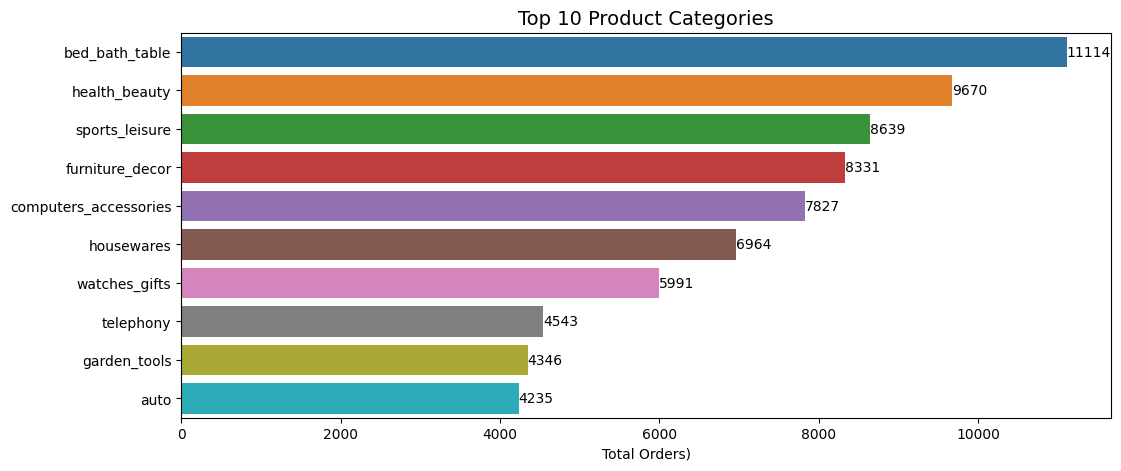

In [17]:
# visualisasi top 10 orders
plt.figure(figsize=(12,5))
ax = sns.barplot(y='product_category_name_english',
           x="order_id",
           data=most_ordered)
for i in ax.containers:
    ax.bar_label(i,)

# Title and label
ax.set_title('Top 10 Product Categories', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Total Orders)', fontsize=10)

# **2. Pertumbuhan Penjualan Tiap Tahun**

In [18]:
# Total orders by year
orders_years = dataset.groupby(['year']).agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).head(10)
orders_years

,order_id
year,
2018,60771
2017,49870
2016,368


Text(0.5, 0, 'Year')

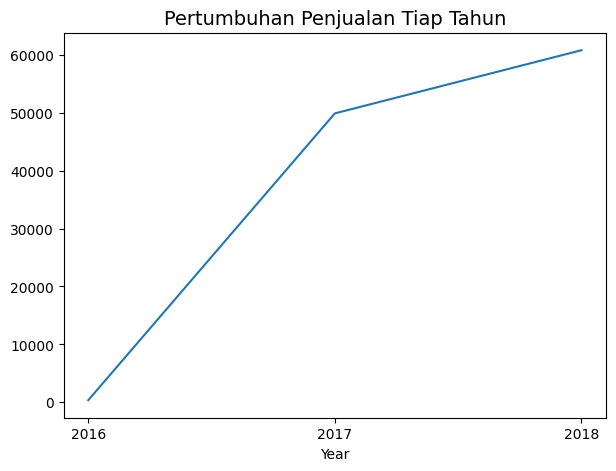

In [19]:
# Visualisasi total orders by Year
import numpy as np

plt.figure(figsize=(7,5))
ax = sns.lineplot(x=orders_years.index,
           y="order_id",
           data=orders_years)
ax.set(xticks=np.arange(2016,2019,1))

ax.set_title('Pertumbuhan Penjualan Tiap Tahun', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('Year', fontsize=10)

# **3. Kota dengan Pembeli Terbanyak**

In [20]:
# Top orders by state
top_order_state = dataset.groupby(['customer_state']).agg(total_orders = ('order_id','count')).sort_values(by='total_orders', ascending=False)
top_order_state.head()

,total_orders
customer_state,
SP,46778
RJ,14349
MG,12942
RS,6132
PR,5661


Text(0.5, 0, 'State')

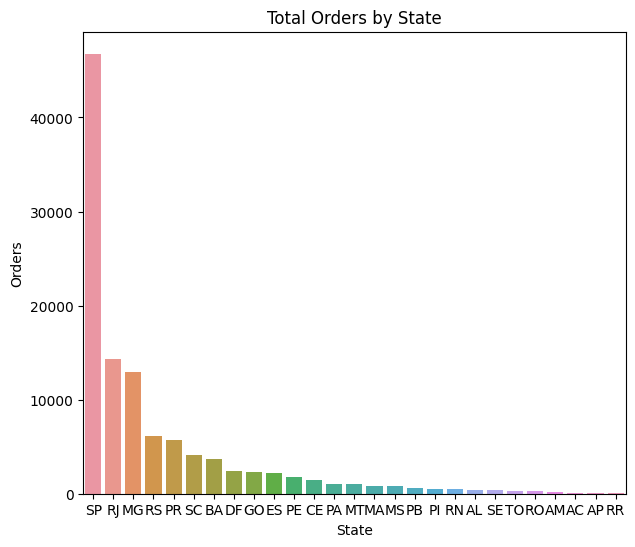

In [26]:
# Visualisasi Total orders by state
fig, ax = plt.subplots(nrows = 1,
                       ncols = 1,
                       figsize = (7, 6))

# Buyer
sns.barplot(y='total_orders',
           x=top_order_state.index,
           data=top_order_state)

# Title and label
ax.set_title('Total Orders by State', fontsize=12)
ax.set_ylabel('Orders')
ax.set_xlabel('State', fontsize=10)